# Modelo Baseline para Analise Inicial

In [2]:
!pip install tensorflow

     |██████████████████████████████▋ | 438.9 MB 4.4 MB/s eta 0:00:05 

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 458.3 MB 6.2 kB/s             
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 462 kB 80.6 MB/s            
     |████████████████████████████████| 5.6 MB 30.1 MB/s            
     |████████████████████████████████| 42 kB 1.9 MB/s             
     |████████████████████████████████| 4.0 MB 15.7 MB/s            
     |████████████████████████████████| 65 kB 5.7 MB/s             
     |████████████████████████████████| 1.3 MB 69.5 MB/s            
     |████████████████████████████████| 57 kB 7.7 MB/s             
     |████████████████████████████████| 781 kB 54.9 MB/s            
     |████████████████████████████████| 4.9 MB 70.2 MB/s            
     |████████████████████████████████| 288 kB 35.3 MB/s            
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30692 sha256=2d4495c6411d32be674a5fe5b28cc57161418bab59b3144fdf42d1a91d9a66ee
  Stored in di

In [4]:
!pip install tensorflow_hub

     |████████████████████████████████| 108 kB 7.1 MB/s            


In [6]:
!pip install tensorflow_text

     |████████████████████████████████| 4.4 MB 9.2 MB/s            


In [9]:
!pip install tf-models-official

     |████████████████████████████████| 1.8 MB 8.1 MB/s            
     |████████████████████████████████| 90 kB 13.8 MB/s            
     |████████████████████████████████| 4.0 MB 59.3 MB/s            
     |████████████████████████████████| 47.6 MB 73.5 MB/s            
     |████████████████████████████████| 43 kB 3.0 MB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 1.2 MB 59.6 MB/s            
     |████████████████████████████████| 2.0 MB 67.6 MB/s            
     |████████████████████████████████| 61 kB 12.0 MB/s            
     |████████████████████████████████| 352 kB 62.8 MB/s            
     |████████████████████████████████| 213 kB 74.0 MB/s            
     |████████████████████████████████| 1.1 MB 81.9 MB/s            
     |████████████████████████████████| 99 kB 13.1 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 98 kB 9.6 MB/s             
  Preparing metadata (setu

In [13]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optmizer

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd 

In [2]:
tf.get_logger().setLevel('ERROR')

In [14]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


2021-11-04 17:11:53.846530: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-04 17:11:53.846638: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-04 17:11:53.846705: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (asl-alan): /proc/driver/nvidia/version does not exist


In [16]:
synopsis_data = pd.read_csv('gs://asl-project-globo-de18f040/707775698945/teste2/token-stopw-preproc_3334343778021408768/token_stopw_dataset/synopsis_token_stopw.csv')

In [19]:
synopsis_data.head(2)

,type,title,synopsis,genre,sinopse_prep,sinopse_token,sinopse_token_stop,word len,sent_StopW
0,FILME,#euvocêtodasnós 1,"#euvocêtodasnós mostra como o feminismo, atrav...",Documentário,#euvocetodasnos mostra como o feminismo atrave...,"['#', 'euvocetodasnos', 'mostra', 'como', 'o',...","['euvocetodasnos', 'mostra', 'feminismo', 'atr...",True,euvocetodasnos mostra feminismo atraves mulher...
1,FILME,#garotas: O Filme,Três jovens amigas que se divertem nas maiores...,Drama Comédia,tres jovens amigas que se divertem nas maiores...,"['tres', 'jovens', 'amigas', 'que', 'se', 'div...","['tres', 'jovens', 'amigas', 'divertem', 'maio...",True,tres jovens amigas divertem maiores festas rio...


In [20]:
def normalization(embeds):
  norms = np.linalg.norm(embeds, 2, axis=1, keepdims=True)
  return embeds/norms

In [21]:
synopsis_list = list(synopsis_data['sent_StopW'])
title_list = list(synopsis_data['title'])
genre_list = list(synopsis_data['genre'])

In [22]:
synopsis_tf = tf.constant(synopsis_list)

2021-11-04 17:13:10.890346: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
synopsis_tf

<tf.Tensor: shape=(1573,), dtype=string, numpy=
array([b'euvocetodasnos mostra feminismo atraves mulheres atuantes blogs redes sociais ganha forca ativismo internet mobilizando outras mulheres abrindo espaco debate publico',
       b'tres jovens amigas divertem maiores festas rio janeiro retorna viagem decidida comportar amigas nao estao dispostas deixa la sair vida festas',
       b'grupo garotas anos idade enfrenta noite horror vicio compulsivo jogo transforma momento cyber bullying noite insanidades',
       ...,
       b'apresentadora karol knopf parte aguas selvagens rio zambeze desafio enfrentar curso desconhecido maiores rios continente africano',
       b'apos acidente inusitado zoey adquire capacidade ver ouvir pensamentos desejos intimos pessoas atraves numeros musicais so ve',
       b'irmaos joaquin julian azulay irao explorar costa inteira africa carro anos convidaram amigo surfista jatyr berasaluce participar expedicao'],
      dtype=object)>

In [23]:
preprocessor = hub.KerasLayer(
    "https://tfhub.dev/google/universal-sentence-encoder-cmlm/multilingual-preprocess/2")
encoder = hub.KerasLayer("https://tfhub.dev/google/LaBSE/2")

2021-11-04 17:13:20.195129: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-04 17:13:48.215484: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1539542016 exceeds 10% of free system memory.


In [24]:
synopsis_embeds = encoder(preprocessor(synopsis_tf))['default']

2021-11-04 17:14:11.830206: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1237057536 exceeds 10% of free system memory.
2021-11-04 17:14:14.629118: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1237057536 exceeds 10% of free system memory.
2021-11-04 17:14:21.272901: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2474115072 exceeds 10% of free system memory.
2021-11-04 17:14:28.570870: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2474115072 exceeds 10% of free system memory.
2021-11-04 17:19:37.584299: W tensorflow/core/framework/op_kernel.cc:1692] OP_REQUIRES failed at einsum_op_impl.h:715 : Resource exhausted: OOM when allocating tensor with shape[1573,12,128,128] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu


ResourceExhaustedError:  OOM when allocating tensor with shape[1573,12,128,128] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[{{node StatefulPartitionedCall/StatefulPartitionedCall/bert_encoder/StatefulPartitionedCall/transformer/layer_10/self_attention/einsum/Einsum}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_restored_function_body_38504]

Function call stack:
restored_function_body


In [14]:
synopsis_embeds.numpy()

array([[ 0.5282365 , -0.32806292,  0.02080287, ..., -0.58878475,
        -0.15428379, -0.32677817],
       [ 0.48184577, -0.28695953, -0.58210933, ..., -0.37681466,
        -0.09699161,  0.0533548 ],
       [-0.13411848, -0.64422673,  0.25236565, ..., -0.49676803,
         0.31465077, -0.08410412],
       ...,
       [ 0.11742541,  0.15053408, -0.4927101 , ..., -0.00647315,
        -0.09353334,  0.41827196],
       [-0.78928345,  0.17359145, -0.2852356 , ...,  0.32632565,
         0.5025315 , -0.15350947],
       [ 0.10679609, -0.47638315, -0.38520324, ...,  0.25720084,
        -0.2207834 , -0.15183023]], dtype=float32)

In [26]:
synopsis_embeds_df = synopsis_data[['title', 'synopsis', 'genre', 'sent_StopW']]
embeds_df = pd.DataFrame(synopsis_embeds.numpy())
synopsis_embeds_df['embeds'] = embeds_df.values.tolist()

<ipython-input-26-831b2be79598>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  synopsis_embeds_df['embeds'] = embeds_df.values.tolist()


In [27]:
synopsis_embeds_df

,title,synopsis,genre,sent_StopW,embeds
0,#euvocêtodasnós 1,"#euvocêtodasnós mostra como o feminismo, atrav...",Documentário,euvocetodasnos mostra feminismo atraves mulher...,"[0.5282365083694458, -0.32806292176246643, 0.0..."
1,#garotas: O Filme,Três jovens amigas que se divertem nas maiores...,Drama Comédia,tres jovens amigas divertem maiores festas rio...,"[0.48184576630592346, -0.28695952892303467, -0..."
2,#horror,Um grupo de garotas de 12 anos de idade enfren...,Terror,grupo garotas anos idade enfrenta noite horror...,"[-0.1341184824705124, -0.6442267298698425, 0.2..."
3,(People) Of Water,"Por milhares de anos, as canoas havaianas cone...",Documentário,milhares anos canoas havaianas conectaram dive...,"[-0.22305095195770264, -0.32206788659095764, -..."
4,10 Segundos,"O ""Galinho de Ouro"" Eder Jofre é um dos maiore...",Drama,galinho ouro eder jofre maiores boxeadores tod...,"[0.08610992133617401, 0.12240675091743469, -0...."
...,...,...,...,...,...
1568,Wolfblood,​A família de Maddy Smith pode se transformar ...,Fantasia,familia maddy smith pode transformar lobo busc...,"[-0.4605693817138672, -0.29872605204582214, 0...."
1569,Wynonna Earp,"Descendente do lendário Wyatt Earp,Wynonna ret...",Ficção,descendente lendario wyatt earp wynonna retorn...,"[-0.32191479206085205, -0.20384849607944489, 0..."
1570,Zambeze,A apresentadora Karol Knopf parte para as agua...,Aventura,apresentadora karol knopf parte aguas selvagen...,"[0.11742541193962097, 0.15053407847881317, -0...."
1571,Zoey's Extraordinary Playlist,"Após um acidente inusitado, Zoey adquire a cap...",Comédia,apos acidente inusitado zoey adquire capacidad...,"[-0.7892834544181824, 0.17359144985675812, -0...."


In [20]:
%tensorboard --logdir logs/fit

UsageError: Line magic function `%tensorboard` not found.


# Clustering analysis 

In [55]:
pd.set_option('display.max_rows', 500)
pd.set_option('max_colwidth', 200)

In [71]:
import nltk
from nltk.cluster import KMeansClusterer
from scipy.spatial import distance_matrix
from scipy.spatial.distance import cdist

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

import seaborn as sns

For n_clusters=2, The Silhouette Coefficient is 0.034893136567873295
For n_clusters=3, The Silhouette Coefficient is 0.012615219775824516
For n_clusters=4, The Silhouette Coefficient is 0.007036952102791059
For n_clusters=5, The Silhouette Coefficient is -0.0017046603457465874
For n_clusters=6, The Silhouette Coefficient is -0.0020275592037787503
For n_clusters=7, The Silhouette Coefficient is -0.0012151517256110823
For n_clusters=8, The Silhouette Coefficient is -0.0034759045700578934
For n_clusters=9, The Silhouette Coefficient is 0.003759766436603401
For n_clusters=10, The Silhouette Coefficient is -0.0058199802052491595
For n_clusters=11, The Silhouette Coefficient is -0.002435897138110081
For n_clusters=12, The Silhouette Coefficient is -0.0036915469493007625
For n_clusters=13, The Silhouette Coefficient is -0.004054525326277479
For n_clusters=14, The Silhouette Coefficient is -0.003273947451117771
For n_clusters=15, The Silhouette Coefficient is 5.91114578118782e-05
For n_cluster

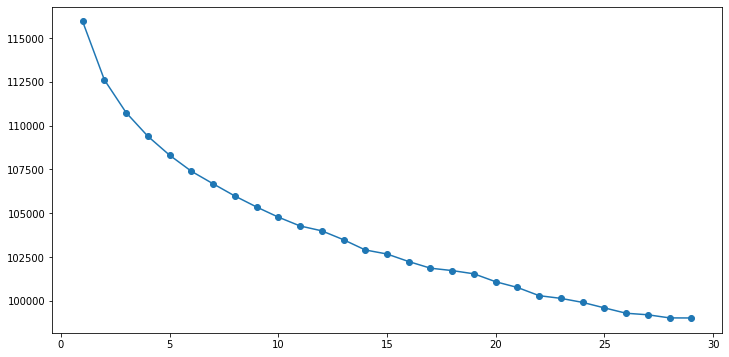

In [44]:
# k means determine k
X = np.array(synopsis_embeds_df['embeds'].tolist())

distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    #kmeanModel = KMeansClusterer(k, distance=nltk.cluster.util.cosine_distance,repeats=25,avoid_empty_clusters=True)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
 
### One more method for 

for n_cluster in range(2, 21):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    #kmeans = KMeansClusterer(n_cluster, distance=nltk.cluster.util.cosine_distance,repeats=25,avoid_empty_clusters=True)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
##dictionary = corpora.Dictionary(texts)
#corpus = [dictionary.doc2bow(text) for text in texts]
#df9['Corpus'] = pd.Series(corpus, index = df9.index)

##### Inertia error method
cluster_range = range( 1, 30 )
cluster_errors = []
for num_clusters in cluster_range:
   clusters = KMeans( num_clusters )
   clusters.fit( X )
   cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [99]:
def clustering_synopsis(data,NUM_CLUSTERS = 26):

    sentences = data['sent_StopW']

    X = np.array(data['embeds'].tolist())

    kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance,repeats=25,avoid_empty_clusters=True)

    assigned_clusters = kclusterer.cluster(X, assign_clusters=True)

    data['cluster'] = pd.Series(assigned_clusters, index=data.index)
    data['centroid'] = data['cluster'].apply(lambda x: kclusterer.means()[x])

    return data, assigned_clusters

In [80]:
def distance_from_centroid(row):
    # type of emb and centroid is different, hence using tolist below
    return distance_matrix([row['embeds']], [row['centroid'].tolist()])[0][0]

In [100]:
embeds_clusters, clusters = clustering_synopsis(synopsis_embeds_df)

<ipython-input-99-3f0505efa332>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = pd.Series(assigned_clusters, index=data.index)
<ipython-input-99-3f0505efa332>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['centroid'] = data['cluster'].apply(lambda x: kclusterer.means()[x])


In [101]:
embeds_clusters['distance_from_centroid'] = embeds_clusters.apply(distance_from_centroid, axis=1)
embeds_clusters

<ipython-input-101-70e940578045>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  embeds_clusters['distance_from_centroid'] = embeds_clusters.apply(distance_from_centroid, axis=1)


,title,synopsis,genre,sent_StopW,embeds,cluster,centroid,distance_from_centroid
0,#euvocêtodasnós 1,"#euvocêtodasnós mostra como o feminismo, através de mulheres atuantes em blogs e redes sociais, ganha força com o ativismo pela internet, mobilizando outras mulheres e abrindo espaço no debate púb...",Documentário,euvocetodasnos mostra feminismo atraves mulheres atuantes blogs redes sociais ganha forca ativismo internet mobilizando outras mulheres abrindo espaco debate publico,"[0.5282365083694458, -0.32806292176246643, 0.020802872255444527, -0.4853069484233856, 0.3730264902114868, 0.11372503638267517, -0.2067250907421112, -0.03996843844652176, -0.5885043740272522, 0.324...",6,"[-0.12799506499726404, -0.19892063487492412, -0.1878281784298743, -0.3524870533434589, -0.06948306681501318, -0.28594049655875164, -0.20227787629754718, -0.403290110209357, -0.03376976489731722, 0...",10.230966
1,#garotas: O Filme,Três jovens amigas que se divertem nas maiores festas do Rio de Janeiro. Uma delas retorna de viagem decidida a se comportar. Mas amigas não estão dispostas a deixá-la sair da vida de festas.,Drama Comédia,tres jovens amigas divertem maiores festas rio janeiro retorna viagem decidida comportar amigas nao estao dispostas deixa la sair vida festas,"[0.48184576630592346, -0.28695952892303467, -0.5821093320846558, -0.2583141624927521, -0.015561276115477085, -0.12997382879257202, -0.08275467157363892, 0.23919090628623962, -0.12719900906085968, ...",10,"[-0.06056409862713295, -0.2509513398221994, -0.07986372178104723, -0.3097173728490785, 0.06004108492900628, -0.22276779627664237, -0.06940703902204162, -0.005663642488120139, 0.05661794619034916, ...",8.730252
2,#horror,Um grupo de garotas de 12 anos de idade enfrenta uma noite de horror quando o vício compulsivo por um jogo transforma um momento de cyber-bullying em uma noite de insanidades.,Terror,grupo garotas anos idade enfrenta noite horror vicio compulsivo jogo transforma momento cyber bullying noite insanidades,"[-0.1341184824705124, -0.6442267298698425, 0.2523656487464905, -0.8309158086776733, 0.3219170868396759, 0.39949965476989746, 0.5414009690284729, 0.024703683331608772, -0.13419775664806366, -0.4472...",7,"[-0.02941904813084201, -0.2552181102081794, -0.07663352810603143, -0.5725776966705041, -0.2109058996351583, -0.034044844566647484, -0.10760750226759527, -0.20611302609806176, 0.0983357500724948, -...",10.674068
3,(People) Of Water,"Por milhares de anos, as canoas havaianas conectaram diversas culturas. O filme segue a história de Rob Prechtl, enquanto ele e seus amigos conectam as raízes de água doce ao mar.",Documentário,milhares anos canoas havaianas conectaram diversas culturas filme segue historia rob prechtl enquanto amigos conectam raizes agua doce mar,"[-0.22305095195770264, -0.32206788659095764, -0.35729745030403137, -0.8133224248886108, 0.018403196707367897, -0.3126792907714844, -0.40087267756462097, -0.46177661418914795, 0.038775734603405, 0....",3,"[-0.08439851957890722, -0.14940038012961546, -0.1256074841444691, -0.4491650394474467, -0.0591039709177696, -0.0042733456525537675, -0.021340823918581005, -0.09799211207363341, 0.04499483794594804...",8.349253
4,10 Segundos,"O ""Galinho de Ouro"" Eder Jofre é um dos maiores boxeadores de todos os tempos. Nem a infância difícil conseguiu impedi-lo de se tornar campeão mundial em duas categorias distintas.",Drama,galinho ouro eder jofre maiores boxeadores todos tempos infancia dificil conseguiu impedi lo tornar campeao mundial duas categorias distintas,"[0.08610992133617401, 0.12240675091743469, -0.14334721863269806, -0.34194421768188477, -0.41821229457855225, 0.010613608174026012, 0.06851668655872345, 0.14643804728984833, 0.04558095335960388, 0....",22,"[0.12551058141570995, -0.1416086178837123, -0.009529539873547484, -0.10701244477467566, 0.009070776525835676, -0.3854251198767681, -0.11240156984450465, -0.2882165956875854, 0.08292760726570567, -...",6.813870
...,...,...,...,...,...,...,...,...
1568,Wolfblood,"​A fa

In [49]:
embeds_clusters.sort_values(by='cluster')

,title,synopsis,genre,sent_StopW,embeds,cluster,centroid,distance_from_centroid
867,O Shaolin Do Sertão,"DURANTE A DÉCADA DE 80, LUTADORES DE VALE-TUDO...",Comédia,durante decada lutadores vale tudo passam difi...,"[-0.3958631753921509, -0.23423175513744354, 0....",0,"[-0.2493077133939736, -0.1707282296625634, -0....",8.019906
697,Macunaíma,"Nascido na Amazônia, um menino negro cresce ha...",Comédia,nascido amazonia menino negro cresce habituado...,"[-0.2843163013458252, -0.014444997534155846, 0...",0,"[-0.2493077133939736, -0.1707282296625634, -0....",7.710022
245,Central Intelligence,"ANTES DE SE TORNAR AGENTE DA CIA, BOB (DWAYNE ...",Ação,antes tornar agente cia bob dwayne johnson ner...,"[-0.10085739940404892, -0.25086772441864014, -...",0,"[-0.2493077133939736, -0.1707282296625634, -0....",8.893843
1377,Cinelab Aprendiz,Assista ao reality show Cinelab Aprendiz. Quin...,Drama,assista reality show cinelab aprendiz quinze a...,"[-0.3491488993167877, 0.17557625472545624, -0....",0,"[-0.2493077133939736, -0.1707282296625634, -0....",7.902024
266,Christmas In Evergreen: Tidings Of Joy,Um escritor cético aparece em Evergreen para o...,Romance,escritor cetico aparece evergreen obter inform...,"[-0.3180067241191864, -0.4165658950805664, 0.0...",0,"[-0.2493077133939736, -0.1707282296625634, -0....",6.336945
...,...,...,...,...,...,...,...,...
607,Julietti: Uma Vida Nas Montanhas 1,"Neste emocionante filme, acompanhamos a tentat...",Aventura,neste emocionante filme acompanhamos tentativa...,"[0.5634318590164185, 0.016838008537888527, 0.2...",8,"[-0.05324696587899708, -0.20818048430492955, -...",9.093730
1351,As Vilãs Que Amamos,"A cada episódio, uma grande atriz brasileira c...",Documentário,cada episodio grande atriz brasileira comparti...,"[0.07895980775356293, 0.2528894543647766, 0.10...",8,"[-0.05324696587899708, -0.20818048430492955, -...",7.769515
1350,As Crianças Que Amamos,As Crianças Que Amamos é uma série de 13 episó...,Documentário,criancas amamos serie episodios conta historia...,"[0.14227314293384552, -0.07027672976255417, -0...",8,"[-0.05324696587899708, -0.20818048430492955, -...",9.707821
298,Concrete Dreams: Skating The Creations Of Osca...,Murilo Peres e Pedro Barros ganham um passe ún...,Radicais Esportes,murilo peres pedro barros ganham passe unico r...,"[0.3126462697982788, 0.195996955037117, -0.159...",8,"[-0.05324696587899708, -0.20818048430492955, -...",6.570987


In [102]:
embeds_clusters.groupby('cluster')['title'].count()

cluster
0      41
1      50
2      65
3      45
4      27
5      90
6      87
7      64
8      68
9      40
10     59
11     23
12     56
13     43
14     81
15    109
16     88
17     67
18     16
19     92
20     44
21     70
22     56
23     40
24    108
25     44
Name: title, dtype: int64

In [107]:
sns.set(rc={'figure.figsize':(25,30)})
colors = [ '#b10026', '#e31a1c', '#fc4e2a', '#fd8d3c','#feb24c', '#fed976', '#ffffb2', '#e5f5e0', '#41ae76','#238b45', '#005824']

<AxesSubplot:xlabel='cluster', ylabel='genre'>

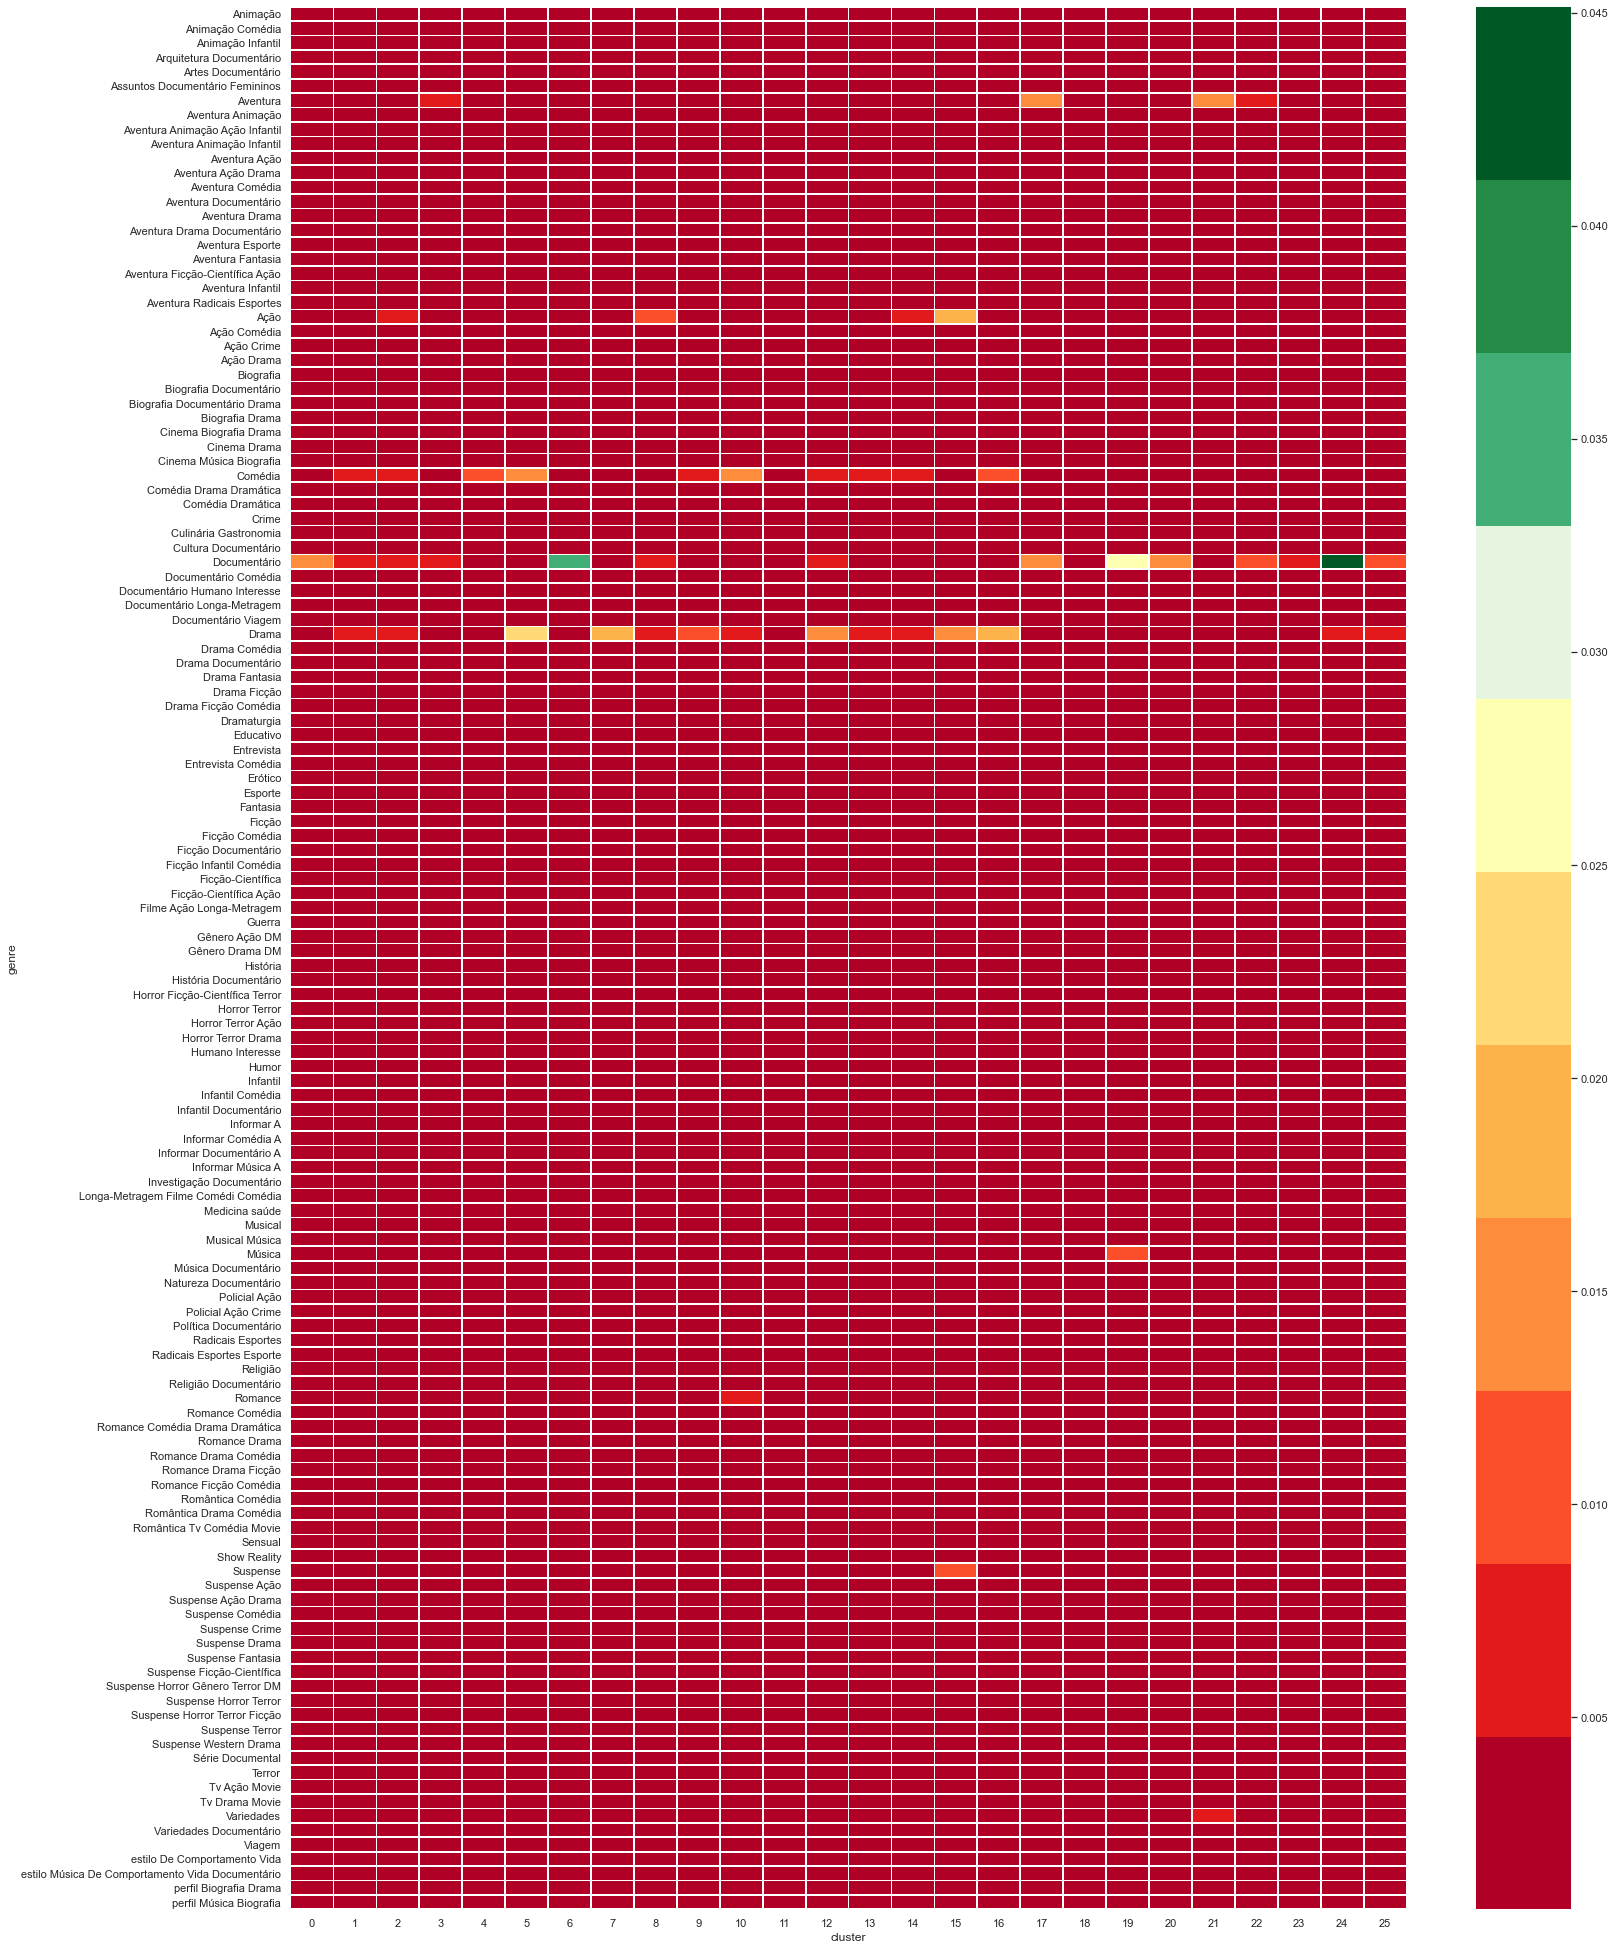

In [111]:
sns.heatmap(pd.crosstab(index=embeds_clusters['genre'], columns=embeds_clusters['cluster'], margins=False, normalize=True), vmin=0.0005, cmap=colors, linewidths=0.75)

In [63]:
embeds_clusters.groupby('cluster')['genre'].value_counts().sort_values(ascending=False)


cluster  genre                                           
5        Documentário                                        114
8        Documentário                                        113
3        Aventura                                             62
2        Drama                                                61
1        Drama                                                56
         Comédia                                              49
7        Ação                                                 49
         Drama                                                49
0        Documentário                                         46
2        Comédia                                              40
0        Drama                                                28
5        Drama                                                28
6        Documentário                                         27
4        Comédia                                              25
6        Drama                  

In [113]:
embeds_clusters[embeds_clusters['cluster'] ==  25].sort_values(by='distance_from_centroid') #ascending=False)

,title,synopsis,genre,sent_StopW,embeds,cluster,centroid,distance_from_centroid
1317,Zuzu Angel,"Após o sumiço do filho Stuart, preso e torturado pela ditadura, a estilista Zuzu Angel decide travar uma batalha contra os militares e denunciar os abusos cometidos pelo regime.",Drama,apos sumico filho stuart preso torturado ditadura estilista zuzu angel decide travar batalha contra militares denunciar abusos cometidos regime,"[-0.14634642004966736, -0.10953836888074875, 0.22180207073688507, -0.296760618686676, -0.05944357439875603, -0.40869396924972534, 0.37496501207351685, -0.08786946535110474, -0.1523990035057068, -0...",25,"[0.02432947955094278, 0.05468070500699634, 0.09452403798191386, -0.31889672230251814, -0.12139321586371145, -0.24380379085513676, -0.08784038073975932, -0.27767019473354926, 0.07981512340484187, -...",5.564498
316,Cymbeline,"Uma gangue liderada por Cymbeline e Iachimo vive em guerra contra policiais corruptos. Os problemas pioram quando Imogen, a filha de Cymbeline, se apaixona por Posthumus.",Drama,gangue liderada cymbeline iachimo vive guerra contra policiais corruptos problemas pioram imogen filha cymbeline apaixona posthumus,"[0.27351200580596924, 0.35209810733795166, 0.14106230437755585, -0.34681281447410583, 0.08956548571586609, 0.14961430430412292, -0.25660133361816406, -0.20877446234226227, 0.09485604614019394, 0.0...",25,"[0.02432947955094278, 0.05468070500699634, 0.09452403798191386, -0.31889672230251814, -0.12139321586371145, -0.24380379085513676, -0.08784038073975932, -0.27767019473354926, 0.07981512340484187, -...",5.927991
1300,Xy Chelsea,"O doc. segue a vida de Chelsea Manning, militar transexual presa por 35 anos em uma prisão masculina após vazar informações confidenciais do exército americano sobre a guerra do Iraque e Afeganistão.",Documentário,doc segue vida chelsea manning militar transexual presa anos prisao masculina apos vazar informacoes confidenciais exercito americano sobre guerra iraque afeganistao,"[0.0614677332341671, 0.15913255512714386, -0.23010262846946716, -0.4634411633014679, -0.4169674217700958, -0.18044140934944153, 0.03066636063158512, -0.1481865644454956, 0.05198300629854202, -0.12...",25,"[0.02432947955094278, 0.05468070500699634, 0.09452403798191386, -0.31889672230251814, -0.12139321586371145, -0.24380379085513676, -0.08784038073975932, -0.27767019473354926, 0.07981512340484187, -...",5.942593
312,Criminal,"Durante uma investigação, o agente da CIA Bill Pope é assassinado. O médico Franks realiza uma cirurgia, transferindo memórias, segredos e sentimentos de Pope para o prisioneiro Jerico. A CIA pass...",Ação,durante investigacao agente cia bill pope assassinado medico franks realiza cirurgia transferindo memorias segredos sentimentos pope prisioneiro jerico cia passa contar jerico solucao caso tempo a...,"[-0.031767573207616806, -0.18118855357170105, -0.40852880477905273, -0.1404813975095749, -0.3842201232910156, -0.08582143485546112, -0.10493019968271255, -0.46884337067604065, -0.10088564455509186...",25,"[0.02432947955094278, 0.05468070500699634, 0.09452403798191386, -0.31889672230251814, -0.12139321586371145, -0.24380379085513676, -0.08784038073975932, -0.27767019473354926, 0.07981512340484187, -...",6.048184
182,Beyond My Grandfather Allende,"Um golpe de Estado no Chile derrubou Salvador Allende, o primeiro presidente socialista eleito democraticamente. Sua neta Marcia recupera as memórias da família pós golpe.",Documentário,golpe estado chile derrubou salvador allende primeiro presidente socialista eleito democraticamente neta marcia recupera memorias familia pos golpe,"[-0.09590519964694977, -0.06177562475204468, 0.2281525731086731, -0.22906243801116943, 0.44006165862083435, -0.562412440776825, -0.03436412662267685, -0.3193308711051941, 0.2197015881538391, -0.11...",25,"[0.02432947955094278, 0.05468070500699634, 0.09452403798191386, -0.31889672230251814, -0.12139321586371145, -0.24380379085513676, -0.08784038073975932, -0.27767019473354926, 0.07981512340484187

### Old 

In [18]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [23]:
pca = PCA()
pca.fit(synopsis_embeds.numpy()) 

PCA()

In [25]:
pca.explained_variance_ratio_

array([4.15897667e-02, 2.96735819e-02, 2.61105392e-02, 2.54768897e-02,
       2.20071878e-02, 1.91371441e-02, 1.84572022e-02, 1.71058327e-02,
       1.63104292e-02, 1.55104920e-02, 1.43664936e-02, 1.43606430e-02,
       1.39315594e-02, 1.34352818e-02, 1.32585056e-02, 1.25523582e-02,
       1.20536992e-02, 1.17322253e-02, 1.13996714e-02, 1.10542495e-02,
       1.08847870e-02, 1.06461812e-02, 1.04015777e-02, 9.93902143e-03,
       9.89042874e-03, 9.62870009e-03, 9.45281424e-03, 9.25625488e-03,
       9.10013448e-03, 8.94719176e-03, 8.78330786e-03, 8.56755581e-03,
       8.49328190e-03, 8.32936540e-03, 8.21552239e-03, 8.06129258e-03,
       7.94745330e-03, 7.72588933e-03, 7.59843737e-03, 7.54468562e-03,
       7.41256727e-03, 7.38599803e-03, 7.13980617e-03, 7.12709827e-03,
       7.05091748e-03, 6.85617840e-03, 6.79544499e-03, 6.71946770e-03,
       6.56365557e-03, 6.48287963e-03, 6.39453763e-03, 6.25324855e-03,
       6.16407674e-03, 6.08832249e-03, 6.05092570e-03, 5.92136942e-03,
      

In [28]:
pca.

None


In [16]:
synopsis_embeds

<tf.Tensor: shape=(1573, 768), dtype=float32, numpy=
array([[ 0.5282365 , -0.32806292,  0.02080287, ..., -0.58878475,
        -0.15428379, -0.32677817],
       [ 0.48184577, -0.28695953, -0.58210933, ..., -0.37681466,
        -0.09699161,  0.0533548 ],
       [-0.13411848, -0.64422673,  0.25236565, ..., -0.49676803,
         0.31465077, -0.08410412],
       ...,
       [ 0.11742541,  0.15053408, -0.4927101 , ..., -0.00647315,
        -0.09353334,  0.41827196],
       [-0.78928345,  0.17359145, -0.2852356 , ...,  0.32632565,
         0.5025315 , -0.15350947],
       [ 0.10679609, -0.47638315, -0.38520324, ...,  0.25720084,
        -0.2207834 , -0.15183023]], dtype=float32)>